# Titanic - Machine Learning from Disaster

# ÍNDICE

* **1 Resumo**
* **2 Coleta de dados**
* **3 Análise Exploratória dos Dados**
* **4 Pré-processamento dos dados**
* **5 Modelagem**
* **6 Predição no conjunto de testes do Kaggle**
* **7 Conclusão**
* **Apêndice A**

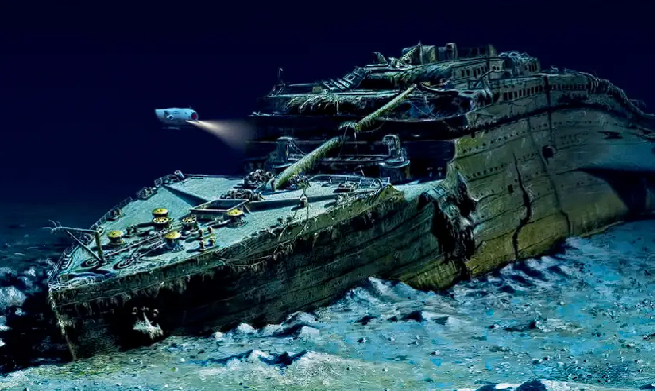

# 1 Resumo

Neste projeto, o utilizei o conhecido dataset da competição do Titanic, obtido do [Kaggle](https://www.kaggle.com/competitions/titanic).  
Na etapa de Análise Exploratória de Dados, procurei responder às seguintes perguntas:  

* Q1 - Qual a proporção de sobreviventes para não-sobreviventes, no desastre?
* Q2 - Proporcionalmente, morreram mais homens ou mulheres?
* Q3 - Como o nível social (ou classe a bordo) influenciou na proporção de mulheres que seriam salvas?
* Q4 - De onde partiram a maioria das pessoas que embarcaram no navio?
* Q5 - Como a idade influenciou na proporção de pessoas salvas?
* Q6 - Em qual classe estava a maioria das pessoas que morreu no desastre?
* Q7 - Em qual classe estava a maioria das pessoas que se salvou no desastre?
* Q8. O fato de estar viajando com cônjuges e/ou irmãos influenciou na chance de ser salvo?
* Q9. O fato de estar viajando com pais e/ou filhos influenciou na chance de ser salvo?
* Q10. As pessoas que pagaram taxas maiores tem mais chance de ser salvas?

Para a construção dos gráficos, empreguei a biblioteca Altair.  
Para a modelagem empreguei o Random Forest Classifier, e otimizei os parâmetros com o GridSearchCV.  
Ao final, apresentei um gráfico construído utilizando a interatividade do Altair, onde é possível visualizar todos os dados simultaneamente, aplicando filtros, para entender melhor o problema.

# 2 Coleta de dados

In [1]:
#Para cálculos e dataframe
import pandas as pd
import numpy as np

#Para criação de gráficos
import altair as alt

#Para separar os dados em datasets de treino e teste
from sklearn.model_selection import train_test_split

#Para substituir os valores ausentes
from sklearn.impute import SimpleImputer

#para transformar variáveis categóricas em numéricas
from sklearn.preprocessing import OneHotEncoder

#Para criar pipelines
from sklearn.pipeline import Pipeline

#Para criar pipelines de pré-processamento
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv(r'train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3 Análise Exploratória dos Dados

## 3.1 Descrição dos dados

De acordo com as informações da competição, segue abaixo a descrição de cada coluna:

* **PassengerId**: Número de identificação do passageiro
* **Survived**: Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass**: Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name**: Nome do passageiro
* **Sex**: Sexo do passageiro
* **Age**: Idade do passageiro
* **SibSp**: Quantidade de cônjuges e irmãos a bordo
* **Parch**: Quantidade de pais e filhos a bordo
* **Ticket**: Número da passagem
* **Fare**: Preço da Passagem
* **Cabin**: Número da cabine do passageiro
* **Embarked**: Porto no qual o passageiro embarcou
C = Cherbourg
Q = Queenstown
S = Southampton

### 3.1.1 Tipos de dados

Vamos verificar os tipos de dados presentes no dataset:

In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Para facilitar as análises, vamos separar os tipos de colunas em 2 tipos: numéricas e categóricas.

In [4]:
var_num = [] # colunas numéricas
var_cat =[] # colunas categóricas

for col in data.columns:
    if data[col].dtypes == object:
        var_cat.append(col)
    else:
        var_num.append(col)

print(f'Variáveis numéricas: {var_num}')
print(f'Variáveis categóricas: {var_cat}')

Variáveis numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Variáveis categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


A coluna 'PClass' que representa a classe em que se encontrou o passageiro pode ser considerada uma variável ordinal, uma vez que os valores contidos na coluna de fato possuem uma relação de *ranking* entre si.

In [5]:
data[var_num].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos observar que a idade média das pessoas que estavam a bordo era de aproximadamente 29 anos de idade e grande parte das pessoas pagaram tickets mais baratos, uma vez que a média foi de 32,20 por taxa, ao passo que o valor máximo pago foi 512,32.

In [6]:
data[var_cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Das variáveis categóricas, podemos concluir que haviam 891 pessoas a bordo, distribuidas em 147 cabines (ou tipos de cabine) diferentes, que embarcaram de 3 lugares distintos.

As colunas 'Name', 'Ticket', 'Cabin' e 'PassengerId' não devem apresentar valor preditivo relevante, pois 'Cabin' irá mudar de acordo com a classe em que se encontra o passageiro, e será difícil imaginar de que forma o número do 'Ticket', 'Name' e 'PassengerId' influenciar na probabilidade de ser salvo.e assim, vamos excluí-las da lista 'var_cat' e 'var_num':

In [7]:
var_cat.remove('Name')
var_cat.remove('Ticket')
var_cat.remove('Cabin')
var_num.remove('PassengerId')
var_num.remove('Survived')

As listas de variáveis ficam da seguinte forma:

In [8]:
print(f'Variáveis numéricas: {var_num}')
print(f'Variáveis categóricas: {var_cat}')

Variáveis numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Variáveis categóricas: ['Sex', 'Embarked']


### 3.1.2 Valores ausentes

Vamos agora verificar se há dados ausentes no dataset.

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Apenas as colunas 'Age' e 'Cabin' possuem valores ausentes.

## 3.2 Relação entre as features e a variável target

### 3.2.1 Variável Target (Survived)

In [10]:
pie = alt.Chart(data['Survived'].value_counts().reset_index()).mark_arc(outerRadius=120,innerRadius=50).encode(
    theta=alt.Theta(field="Survived", type="quantitative"),
    color=alt.Color(field="index", type="nominal"))

text = pie.mark_text(radius=-180, size=20).encode(alt.Text("Survived"))

pie + text

alt.LayerChart(...)

* **Q1 - A proporção de sobreviventes é de 342 para 549, o que não indica desbalanceamento dos dados.**

### 3.2.2 Variáveis categóricas

In [11]:
graf = alt.Chart(data)

#### Sex (Sexo)

In [12]:
graf.mark_bar(size=30).encode(
    x='Sex:N',
    y='count(Survived)',
    color='Survived:N',
    #column='Survived'
    ).properties(width=200)

alt.Chart(...)

* **Q2 - Proporcionalmente, morreram muito mais homens do que mulheres.**

In [13]:
alt.Chart(data[data['Sex']=='female']).mark_bar(size=30).encode(
    x='Pclass:O',
    y='count(Pclass)',
    color='Survived:N'
    ).properties(width=200)

alt.Chart(...)

* **Q3 - Entre as mulheres, as que tiveram maior chance de se salvar estavam na 1ª e 2ª classes.**

#### Embarked (Cidade de embarque)

In [14]:
graf.mark_bar(size=30).encode(
    x='Embarked:N',
    y='count(Embarked)',
    color='Survived:N',
    ).properties(width=200)


alt.Chart(...)

* **Q4 - A maioria das pessoas a bordo do navio, embarcaram em Southampton.**  
Obs: Vemos também uma pequena quantidade de dados nulos ou ausentes na coluna.

### 3.2.3 Variáveis numéricas

#### Age (Idade)

In [15]:
graf.mark_bar(size=30).encode(
    alt.X('Age:Q', 
          scale=alt.Scale(domain=(0,80)), 
          bin=alt.Bin(maxbins=10)),
    alt.Y('count(Age)'),
    color='Survived:N'
    ).properties(width=600)

alt.Chart(...)

* **Q5 - Apenas os menores de 10 anos tiveram mais chance de ser salvos.  
Entre 25 e 35 anos, as chances de ser salvos foram muito próximas.**

#### Pclass (Classe do bilhete)

In [16]:
graf.mark_bar(size=30).encode(
    x='Pclass:O',
    y='count(Pclass)',
    color='Survived:N'
    ).properties(width=200)


alt.Chart(...)

* **Q6 - A maioria das pessoas que morreu no desastre estavam na 3ª classe.**
* **Q7 - A maioria das pessoas que sobreviveu ao desastre estavam na 1ª classe.**

#### SibSp (Quantidade de cônjuges e irmãos a bordo)

In [17]:
sibsp1 = alt.Chart(data[data.SibSp<2]).mark_bar(size=30).encode(
    alt.X('SibSp:O'
         ),
    alt.Y('count(SibSp)'
         ),
    color='Survived:N'
    ).properties(width=300)

sibsp2 = alt.Chart(data[data.SibSp>=2]).mark_bar(size=30).encode(
    alt.X('SibSp:O'
         ),
    alt.Y('count(SibSp)'
         ),
    color='Survived:N'
    ).properties(width=300)

sibsp1 | sibsp2

alt.HConcatChart(...)

* **Q8 - Percebemos, visualmente, que quem tinha 1 ou 2 irmãos/cônjuge teve um pouco mais de chance de se salvar, ao passo que, quem tinham 3 ou mais, teve pouca chance.**

#### Parch (Quantidade de pais e filhos a bordo)

In [18]:
Parch1 = alt.Chart(data[data.Parch<3]).mark_bar(size=30).encode(
    alt.X('Parch:O'
         ),
    alt.Y('count(Parch)'
         ),
    color='Survived:N'
    ).properties(width=300)

Parch2 = alt.Chart(data[data.Parch>=3]).mark_bar(size=30).encode(
    alt.X('Parch:O'
         ),
    alt.Y('count(Parch)'
         ),
    color='Survived:N'
    ).properties(width=300)

Parch1 | Parch2

alt.HConcatChart(...)

* **Q9 - É possível perceber que, proporcionalmente. quem tinha apenas 1 ou 3 (filhos e/ou pais) teve mais chance de se salvar do que quem estava sozinho ou os demais.**

#### Fare (Preço da Passagem)

In [19]:
graf.mark_boxplot(size=100).encode(
    x='Survived:N',
    y='Fare:Q',color='Survived:N'
).properties(width=400,
                height=300)

alt.Chart(...)

* **Q10 - De maneira geral, vemos que quanto maior a taxa, maior a probabilidade de ser salvo.**

# 4 Pré-processamento dos dados

## 4.1 Test/Train Split

Vamos dividr os dados entre dados de treino e dados de teste, que corresponderão a 40% dos dados totais.

In [20]:
#Definindo as variáveis X e y

X = data[var_cat+var_num]
y = data['Survived']

#Realizando o split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 4.3 Pipeline de pré-processamento

In [21]:
#Definindo o Pipeline de cada tipo de variável

num_transf = Pipeline([
    ('imputer_num', SimpleImputer(strategy='mean')),
    ])

cat_transf = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

#instanciando o preprocessador
preprocessor = ColumnTransformer([
    ('num', num_transf, var_num),
    ('cat', cat_transf, var_cat),
])

In [22]:
#ajustando o preprocessador
preprocessor.fit(X_train)

#transformando os dados de X_train
X_train = preprocessor.transform(X_train)

#transformando os dados de X_test
X_test = preprocessor.transform(X_test)

# 5 Modelagem

Para a modelagem, utilizaremos o Random Forest Classifier, que é um modelo ensemble de várias árvores de decisão.  

A métrica utilizada na competição é a Acurácia. Sem realizar nenhum tipo de ajuste de parâmetros, vamos inicialmente verificar qual será o score.

In [23]:
from sklearn.metrics import accuracy_score

## 5.4 Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
#instanciando o modelo
rfc = RandomForestClassifier(random_state=1)

#ajustando o modelo
rfc.fit(X_train,y_train)

#verificando o desempenho no conjuto de testes
print(f'A acurácia do modelo é: {accuracy_score(rfc.predict(X_test),y_test)}')


A acurácia do modelo é: 0.7871148459383753


## 5.5 Otimização do modelo

Agora que já temos um valor de acurácia como referência, usaremos o GridSearchCV, que exaustivamente combina os parâmetros que são instanciados, a fim de encontrar qual a combinação que atinge o melhor desempenho:

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = {'random_state':[1],
             'max_features':['sqrt','log2',None],
             'max_leaf_nodes':[2,4,6],
             'n_estimators':[50,100,150,200],
              'class_weight':['balanced',None]
             }

In [28]:
#instanciando o modelo
model = GridSearchCV(rfc, parameters)

#treinando o modelo
model.fit(X_train, y_train)

#obtendo os melhores parâmetros para o modelo
model.best_params_

{'class_weight': None,
 'max_features': None,
 'max_leaf_nodes': 6,
 'n_estimators': 150,
 'random_state': 1}

In [29]:
# Desempenho do modelo nos dados de treino
model.best_score_

0.8314759301710456

In [30]:
#calculando a acurácia nos dados de teste
print(f'A acurácia do modelo otimizado é: {accuracy_score(model.predict(X_test),y_test)}')

A acurácia do modelo otimizado é: 0.7955182072829131


# 6 Predição no conjunto de testes do Kaggle

In [31]:
data_test = pd.read_csv(r'test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
#Definindo o conjunto de features para os dados de teste
X_test = data_test[var_num+var_cat]

#Processando os dados de acordo com as transformações definidas anteriomente para o dataset de treino
X_test = preprocessor.transform(X_test)

In [33]:
#Obtendo as predições para o dataset
y_pred = model.predict(X_test)

In [34]:
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission['PassengerId'] = data_test['PassengerId']
submission['Survived'] = y_pred

In [35]:
submission.to_csv('submission.csv', index=False)

### **Score no Kaggle: 0.78708**

# Apêndice A

Apresento abaixo um gráfico interativo construído no Altair, que nos possibilita visualizar a distribuição de cada ponto do dataset em função de algumas variáveis.

Temos no Eixo X a variável 'Age' e no Eixo Y a variável 'Fare'.  

Minha intenção é mostrar como o Altair provê alguns recursos como:

* **zoom** no gráfico,
* exibição do **rótulo** de cada ponto.

Além disso, é possível filtrar pelos seguintes atributos;

* Pclass, utilizando um **slider**,
* Embarked, utilizando um **radio**,
* sex, utilizando um **dropdown**.

Finalmente, é possível ainda filtrar a variável 'Survived', clicando nos ícones da própria legenda.

O Altair permite criar esse tipo de gráfico de forma simples e intuitiva.

Você pode conferir um tutorial básico para o Altair nesse [link](https://hermannvargens.wixsite.com/dados/post/explorando-a-visualização-de-dados-com-a-biblioteca-altair), incluindo a interatividade.

In [37]:
#Primeiro definimos quais seletores estarão presentes nos gráficos.

#Dropdown
input_dropdown_sex = alt.binding_select(options=['female','male'], name='Sex')
#Radio
radio_embarked = alt.binding_radio(options=['C','Q','S'], name='Embarked')
#Slider
slider_pclass = alt.binding_range(min=1, max=3, step=1)


#Agora definimos de que forma os seletores irão interagir no gráfico

#Dropdown
selection_sex = alt.selection_single(fields=['Sex'], bind=input_dropdown_sex)
#Radio
selection_embarked = alt.selection_single(fields=['Embarked'], bind=radio_embarked)
#Slider
selection_pclass = alt.selection_single(bind=slider_pclass, fields=['Pclass'], name="Classe")


#Aqui dizemos ao Altair que utilizará a legenda de cores também como filtro

selection = alt.selection_multi(fields=['Survived'])
color = alt.condition(selection,
                      alt.Color('Survived:N', legend=None),
                      alt.value('lightgray'))

#Definimos o Zoom
scales = alt.selection_interval(bind='scales')

#Agora podemos construir os gráficos

#Este é o gráfico principal, a esquerda
scatter = graf.mark_point().encode(
    y='Fare',
    x='Age',
    color = color,
    tooltip=['Name','Sex','Survived','Age','Pclass'] # Tooltip serve para informar os rótulos dos pontos,quando posicionamos o mouse
        #usamos add_selection para chamar os seletores
        #usamos transform_filter para executar o filtro
        ).add_selection(selection_sex).transform_filter(selection_sex
        ).add_selection(selection_embarked).transform_filter(selection_embarked
        ).add_selection(selection_pclass).transform_filter(selection_pclass
        ).add_selection(scales
        ).properties(title='Scatterplot')

#Este é o gráfico do centro (a legenda), que serve para filtrar a coluna Survived
legend = graf.mark_point().encode(
    y=alt.Y('Survived:N', axis=alt.Axis(orient='right')),
    color=color).add_selection(selection)

#Abaixo está o gráfico de barras

bar = graf.mark_bar().encode(
    y='count(Survived)',
    x='Sex', 
    color = color,
    tooltip=['Sex','Survived','Age','SibSp','Parch'] # Tooltip serve para informar os rótulos dos pontos,quando posicionamos o mouse
        #usamos add_selection para chamar os seletores
        #usamos transform_filter para executar o filtro
        ).add_selection(selection_sex).transform_filter(selection_sex
        ).add_selection(selection_embarked).transform_filter(selection_embarked
        ).add_selection(selection_pclass).transform_filter(selection_pclass
        ).add_selection(scales
        ).properties(title='Barplot', width=200)
#
scatter | legend | bar #Chamamos os três gráficos separados por uma barra vertical

alt.HConcatChart(...)